In [36]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [37]:
import numpy as np
import h5py
from time import localtime as time
from time import strftime as timeformat
from glob import glob
import matplotlib.pyplot as plt
import dlib

In [38]:
from modules.preprocessing import LipDetectorDlib
from modules.framestream import VideoStream, TranscriptFileStream
from modules.lipreading import WordReader
from modules.generators import SimpleGenerator
from modules.textprocessing import *

In [39]:
datasetPath = '/media/sziraqui/IRAQUI-HDD1/VSP/Datasets/GRID'
videoList = glob(os.path.join(datasetPath, 'videos', '*.mpg'))[:10]
sampleIds = list(map(lambda x: ''.join(os.path.basename(x).split('.')[:-1]), videoList))

In [40]:
vidIndex = 1
vs = VideoStream(videoList[vidIndex])
vs.set_source()
win = dlib.image_window()
img = vs.next_frame()
while img is not None:
    win.set_image(img)
    img = vs.next_frame()

In [41]:
ts = TranscriptFileStream(os.path.join(datasetPath, 'transcripts', sampleIds[vidIndex]+'.align'),ignoreList=['sil','sp'],timeFactor=0.001)
ts.buffer_frames()
print(ts.transcriptLines)
print(ts.buffer)

['0 12000 sil', '12000 16500 bin', '16500 21250 blue', '21250 23250 at', '23250 27500 b', '27500 33000 eight', '33000 39250 now', '39250 74500 sil']
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 1, 8, 8, 13, 1, 11, 20, 4, 27, 0, 19, 1, 1, 1, 1, 1, 4, 8, 6, 7, 19, 13, 14, 14, 14, 14, 22, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]


In [42]:
ints2word(ts.buffer)

'____________biinblue-atbbbbbeightnoooow____________________________________'

In [43]:
params = {
    'resume': False,
    'initial_epoch': 120,
    'frame_length': 15,
    'frame_width': 100,
    'frame_height': 50,
    'hdf5_data_list': glob(os.path.abspath('../datasets')+'/*grid*words15*.hdf5', recursive=True),
    'generator_queue_size': 2, 
    'loss_func':'categorical_crossentropy',
    'sample_size': 1024,
    'batch_size': 32,
    'epochs': 120,
    'learning_rate': 1e-03,
    'learning_beta1': 0.9,
    'learning_beta2': 0.999,
    'learning_decay': 1e-08,
    'validation_split': 0.2,
    'model_file_checkpoint': os.path.abspath('../weights/lipnet_15_08-12-2018-00-38-59.hdf5'),
    'model_file': os.path.abspath('../weights/lipnet_15_'+timeformat("%d-%m-%Y-%H-%M-%S", time())+'.hdf5'),
    'log_dir': os.path.abspath('../logs')
}

In [44]:
wr = WordReader(params)
wr.model.load_weights(params['model_file_checkpoint'])

In [45]:
xtest, ytest = None,None
with h5py.File(params['hdf5_data_list'][1], 'r') as f:
    xtest = f["features"][:]
    ytest = f["labels"][:]

In [46]:
print('xtest shape:', xtest.shape)
print('ytest shape:', ytest.shape)

xtest shape: (786, 15, 50, 100, 3)
ytest shape: (786, 15, 28)


In [47]:
def imshow(img):
    plt.imshow(img)
    plt.show()

In [48]:
test_index = 38

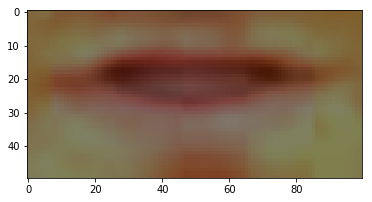

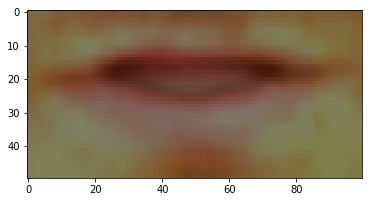

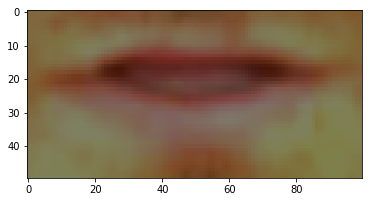

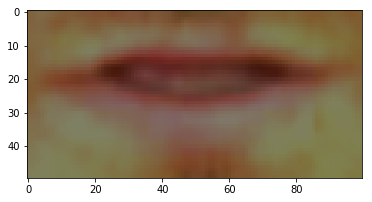

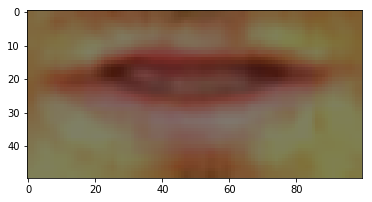

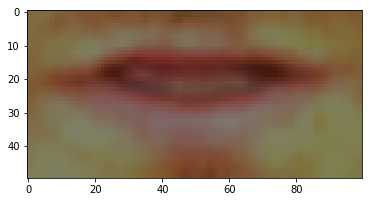

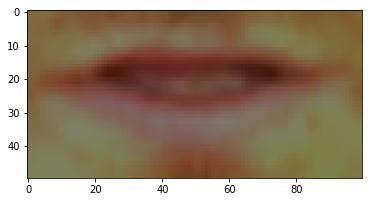

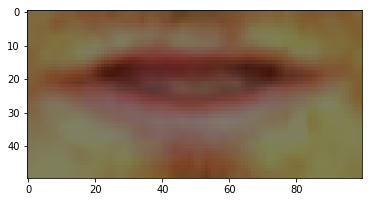

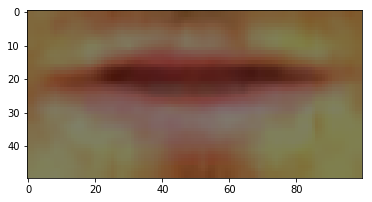

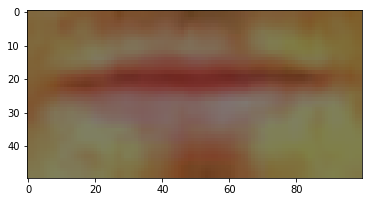

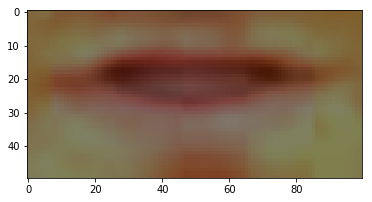

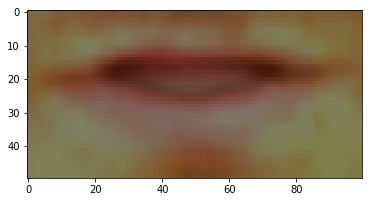

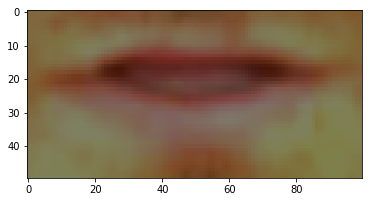

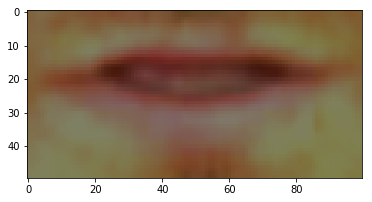

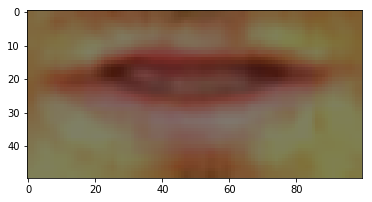

In [49]:
for frame in xtest[test_index]:
    plt.imshow(frame)
    plt.show()
    #plt.hold()

In [50]:
wr.model.evaluate(xtest,ytest)

786/786 [==============================] - 181s 230ms/step


[2.3796156471922196, 0.4352841400766494]

In [51]:
wr.predict_raw(xtest[test_index])

array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26])

In [52]:
wr.predict_word(xtest[test_index])

'_'